# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | alice springs
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | st. john's
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | bilibino
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | minas de marcona
Processing Record 12 of Set 1 | sisimiut
Processing Record 13 of Set 1 | port mathurin
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | cannonvale
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | rouissat
Processing Record 20 of Set 1 | madarounfa
Processing Record 21 of Set 1 | bubaque
Processing Record 22 of Set 1 | severo-yeni

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,7.85,75,75,3.09,CA,1723605775
1,alice springs,-23.7000,133.8833,24.75,18,0,3.09,AU,1723606016
2,waitangi,-43.9535,-176.5597,8.79,92,98,2.68,NZ,1723606017
3,st. john's,47.5649,-52.7093,12.76,95,100,6.71,CA,1723606019
4,adamstown,-25.0660,-130.1015,21.89,86,100,7.45,PN,1723606020


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,7.85,75,75,3.09,CA,1723605775
1,alice springs,-23.7000,133.8833,24.75,18,0,3.09,AU,1723606016
2,waitangi,-43.9535,-176.5597,8.79,92,98,2.68,NZ,1723606017
3,st. john's,47.5649,-52.7093,12.76,95,100,6.71,CA,1723606019
4,adamstown,-25.0660,-130.1015,21.89,86,100,7.45,PN,1723606020


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

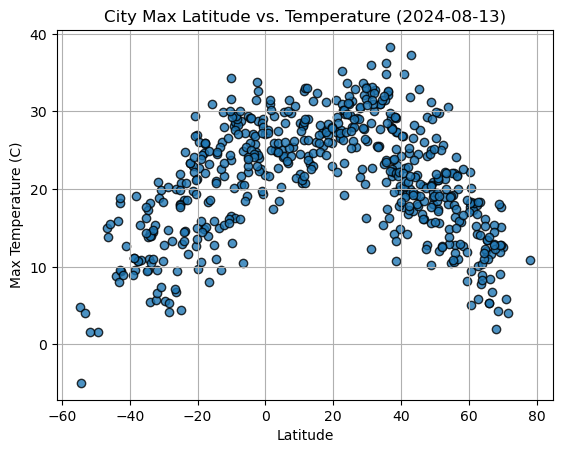

In [9]:
from datetime import datetime
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

date = datetime.now().strftime("%Y-%m-%d")
# Incorporate the other graph properties
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

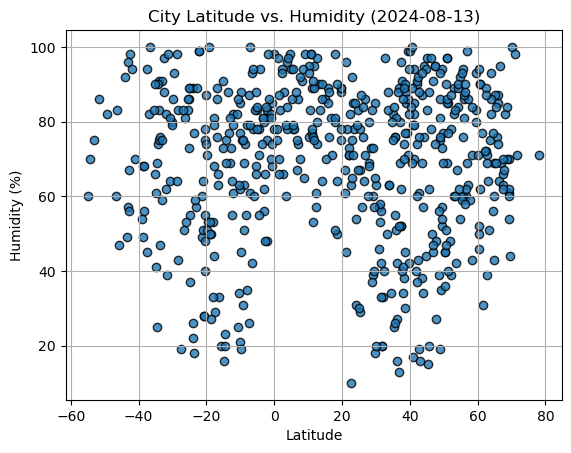

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

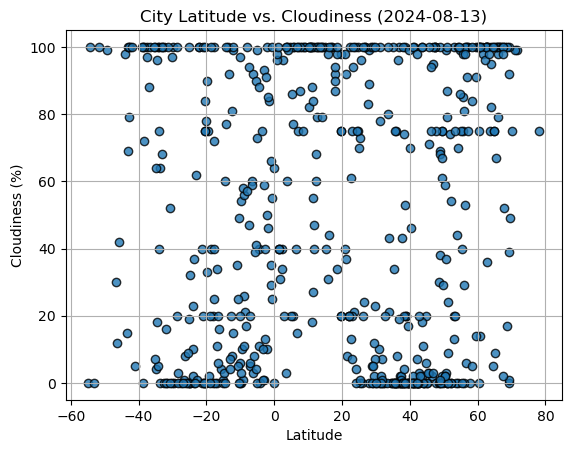

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

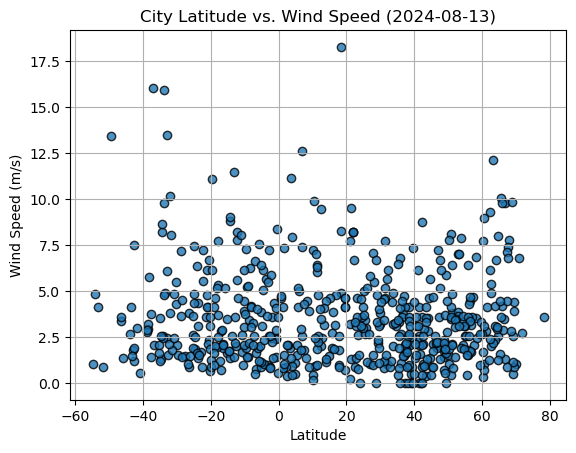

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, x_label, y_label, title, output_file):
    """
    Creates a scatter plot with a linear regression line.

    Parameters:
    x (pd.Series): The data for the x-axis.
    y (pd.Series): The data for the y-axis.
    x_label (str): The label for the x-axis.
    y_label (str): The label for the y-axis.
    title (str): The title of the plot.
    output_file (str): The file path to save the plot.

    Returns:
    None
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)

    # Create scatter plot
    plt.scatter(x, y, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Data Points")

    # Plot the linear regression line
    plt.plot(x, slope * x + intercept, color="red")

    # Add the linear equation to the plot
    # Place the equation in a white space by adjusting xy coordinates
    props = dict(boxstyle='round', facecolor='white', alpha=0.8)
    plt.gca().annotate(f"Linear equation: y = {slope:.2f}x + {intercept:.2f}", 
                       xy=(0.05, 0.05), xycoords="axes fraction", fontsize=12, color="red",
                       horizontalalignment="left", verticalalignment="bottom", bbox=props)

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()

    # Disable the grid
    plt.grid(False)

    # Save the figure
    plt.savefig(output_file)

    # Show the plot
    plt.show()

    # Print the r-value separately
    print(f"The r-value is: {r_value:.2f}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,7.85,75,75,3.09,CA,1723605775
3,st. john's,47.5649,-52.7093,12.76,95,100,6.71,CA,1723606019
5,bilibino,68.0546,166.4372,2.01,82,100,7.80,RU,1723606022
11,sisimiut,66.9395,-53.6735,6.72,69,100,1.30,GL,1723606030
16,college,64.8569,-147.8028,16.15,60,75,2.57,US,1723606039


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,alice springs,-23.7000,133.8833,24.75,18,0,3.09,AU,1723606016
2,waitangi,-43.9535,-176.5597,8.79,92,98,2.68,NZ,1723606017
4,adamstown,-25.0660,-130.1015,21.89,86,100,7.45,PN,1723606020
6,lebu,-37.6167,-73.6500,10.79,94,100,1.40,CL,1723605872
7,castro,-24.7911,-50.0119,4.44,89,0,1.82,BR,1723606025


###  Temperature vs. Latitude Linear Regression Plot

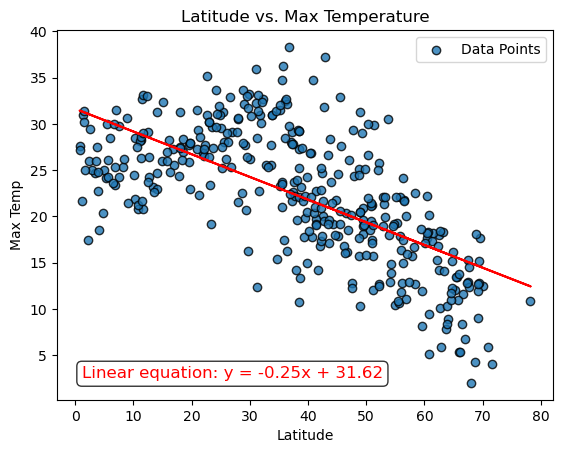

The r-value is: -0.66


In [16]:
# Linear regression on Northern Hemisphere
# Filter the data for the Northern Hemisphere
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Create the linear regression plot for Northern Hemisphere: Temperature vs. Latitude
create_linear_regression_plot(
    northern_hemisphere_df["Lat"], 
    northern_hemisphere_df["Max Temp"], 
    "Latitude", 
    "Max Temp", 
    "Latitude vs. Max Temperature", 
    "output_data/Northern_Hemisphere_Temperature.png"
)

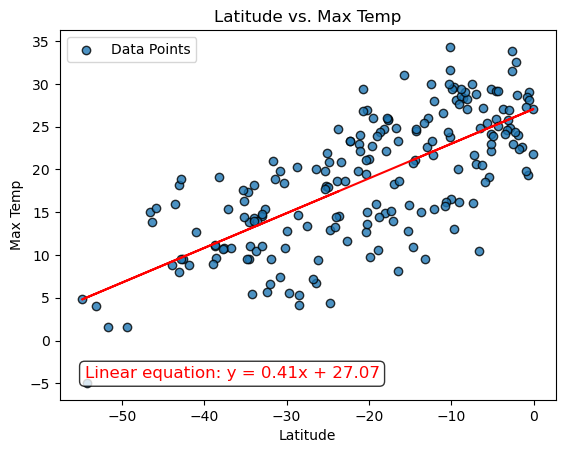

The r-value is: 0.72


In [17]:
# Linear regression on Southern Hemisphere
# Filter the data for the Southern Hemisphere
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Create the linear regression plot for Southern Hemisphere: Latitude vs. Max Temperature
create_linear_regression_plot(
    southern_hemisphere_df["Lat"], 
    southern_hemisphere_df["Max Temp"], 
    "Latitude", 
    "Max Temp", 
    "Latitude vs. Max Temp", 
    "output_data/Southern_Hemisphere_Temperature.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

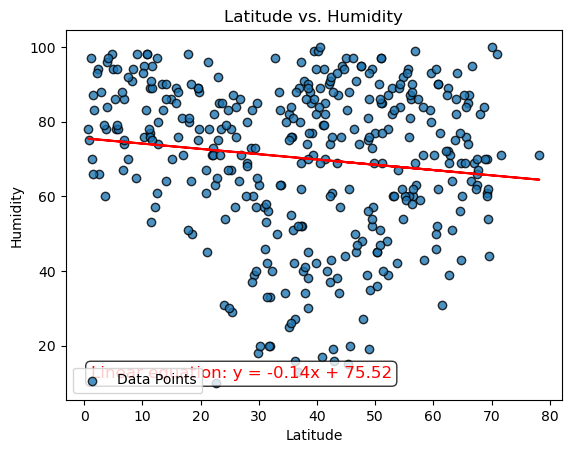

The r-value is: -0.13


In [18]:
# Northern Hemisphere
# Filtrar los datos para el hemisferio norte
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Realizar la regresión lineal para Humidity vs. Latitude en el hemisferio norte
create_linear_regression_plot(
    northern_hemisphere_df["Lat"], 
    northern_hemisphere_df["Humidity"], 
    "Latitude", 
    "Humidity", 
    "Latitude vs. Humidity", 
    "output_data/Northern_Hemisphere_Humidity.png"
)

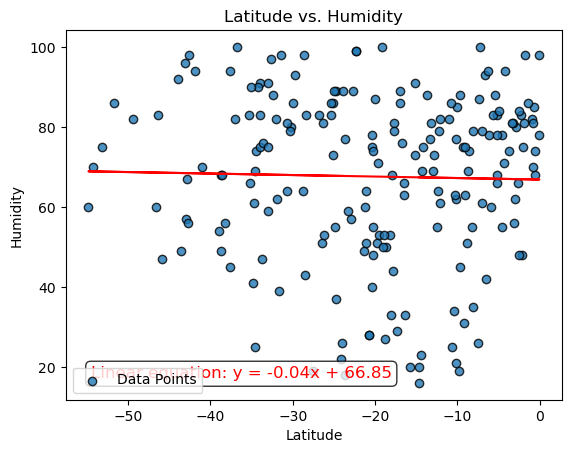

The r-value is: -0.02


In [19]:
# Southern Hemisphere
# Filtrar los datos para el hemisferio sur
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Realizar la regresión lineal para Humidity vs. Latitude en el hemisferio sur
create_linear_regression_plot(
    southern_hemisphere_df["Lat"], 
    southern_hemisphere_df["Humidity"], 
    "Latitude", 
    "Humidity", 
    "Latitude vs. Humidity", 
    "output_data/Southern_Hemisphere_Humidity.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

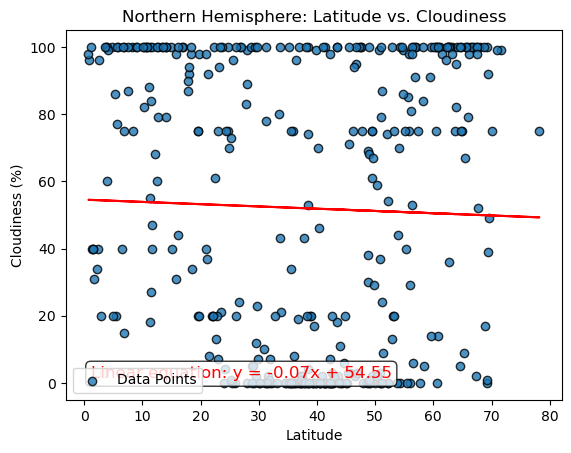

The r-value is: -0.03


In [20]:
# Northern Hemisphere
# Filtrar los datos para el hemisferio norte
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Realizar la regresión lineal para Cloudiness vs. Latitude en el hemisferio norte
create_linear_regression_plot(
    northern_hemisphere_df["Lat"], 
    northern_hemisphere_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Northern Hemisphere: Latitude vs. Cloudiness", 
    "output_data/Northern_Hemisphere_Cloudiness.png"
)

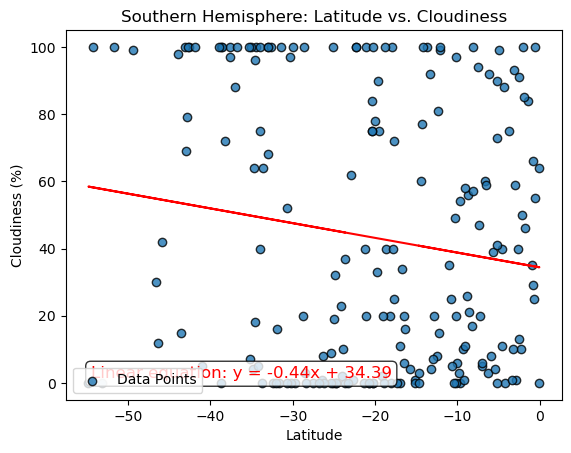

The r-value is: -0.15


In [21]:
# Southern Hemisphere
# Filtrar los datos para el hemisferio sur
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Realizar la regresión lineal para Cloudiness vs. Latitude en el hemisferio sur
create_linear_regression_plot(
    southern_hemisphere_df["Lat"], 
    southern_hemisphere_df["Cloudiness"], 
    "Latitude", 
    "Cloudiness (%)", 
    "Southern Hemisphere: Latitude vs. Cloudiness", 
    "output_data/Southern_Hemisphere_Cloudiness.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

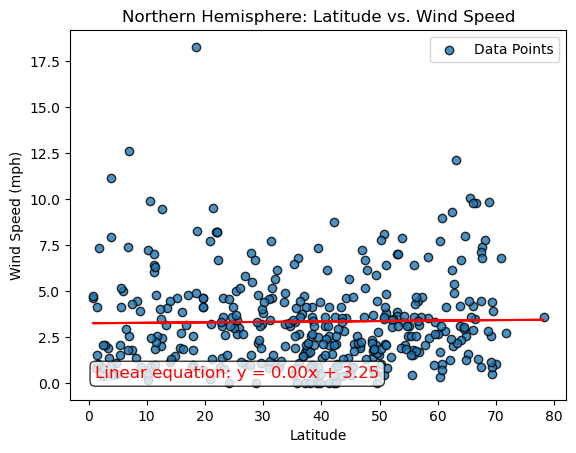

The r-value is: 0.02


In [22]:
# Northern Hemisphere
# Filtrar los datos para el hemisferio norte
northern_hemisphere_df = city_data_df[city_data_df["Lat"] >= 0]

# Realizar la regresión lineal para Wind Speed vs. Latitude en el hemisferio norte
create_linear_regression_plot(
    northern_hemisphere_df["Lat"], 
    northern_hemisphere_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (mph)", 
    "Northern Hemisphere: Latitude vs. Wind Speed", 
    "output_data/Northern_Hemisphere_Wind_Speed.png"
)

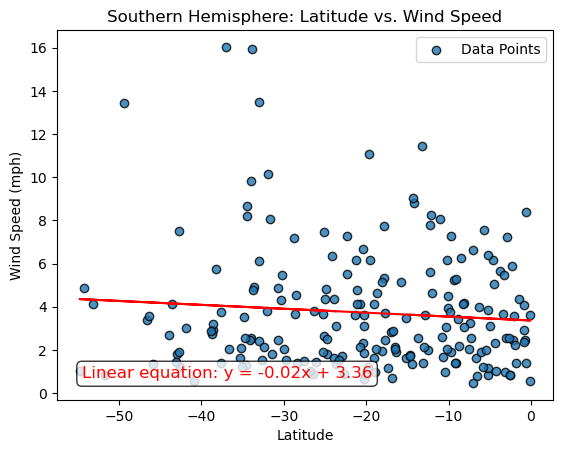

The r-value is: -0.09


In [23]:
# Southern Hemisphere
# Filtrar los datos para el hemisferio sur
southern_hemisphere_df = city_data_df[city_data_df["Lat"] < 0]

# Realizar la regresión lineal para Wind Speed vs. Latitude en el hemisferio sur
create_linear_regression_plot(
    southern_hemisphere_df["Lat"], 
    southern_hemisphere_df["Wind Speed"], 
    "Latitude", 
    "Wind Speed (mph)", 
    "Southern Hemisphere: Latitude vs. Wind Speed", 
    "output_data/Southern_Hemisphere_Wind_Speed.png"
)

**Discussion about the linear relationship:** YOUR RESPONSE HERE